### Notebook to generate the figure showing the LKmeans 2D centres


In [1]:
using CSV
using DataFrames
using CairoMakie

In [2]:
centers = CSV.read("../../Data/cluster_centers_02.csv", DataFrame)
cluster_assignments = CSV.read("../../Data/cluster_assignments_02.csv", DataFrame)
data = CSV.read("../../Data/cluster_data_02.csv", DataFrame);

In [15]:
cluster_labels

100-element Vector{Int64}:
 1
 2
 2
 1
 1
 2
 2
 1
 1
 2
 ⋮
 1
 1
 2
 2
 1
 1
 2
 2
 1

In [20]:
centers

Row,x1,x2
,Float64,Float64
1,0.0402712,0.0402303
2,0.0401301,0.036097
3,0.0402041,0.0318951
4,0.0402183,0.0280738
5,0.039947,0.0241763


In [33]:
centers[3, :]

Row,x1,x2
,Float64,Float64
3,0.0402041,0.0318951


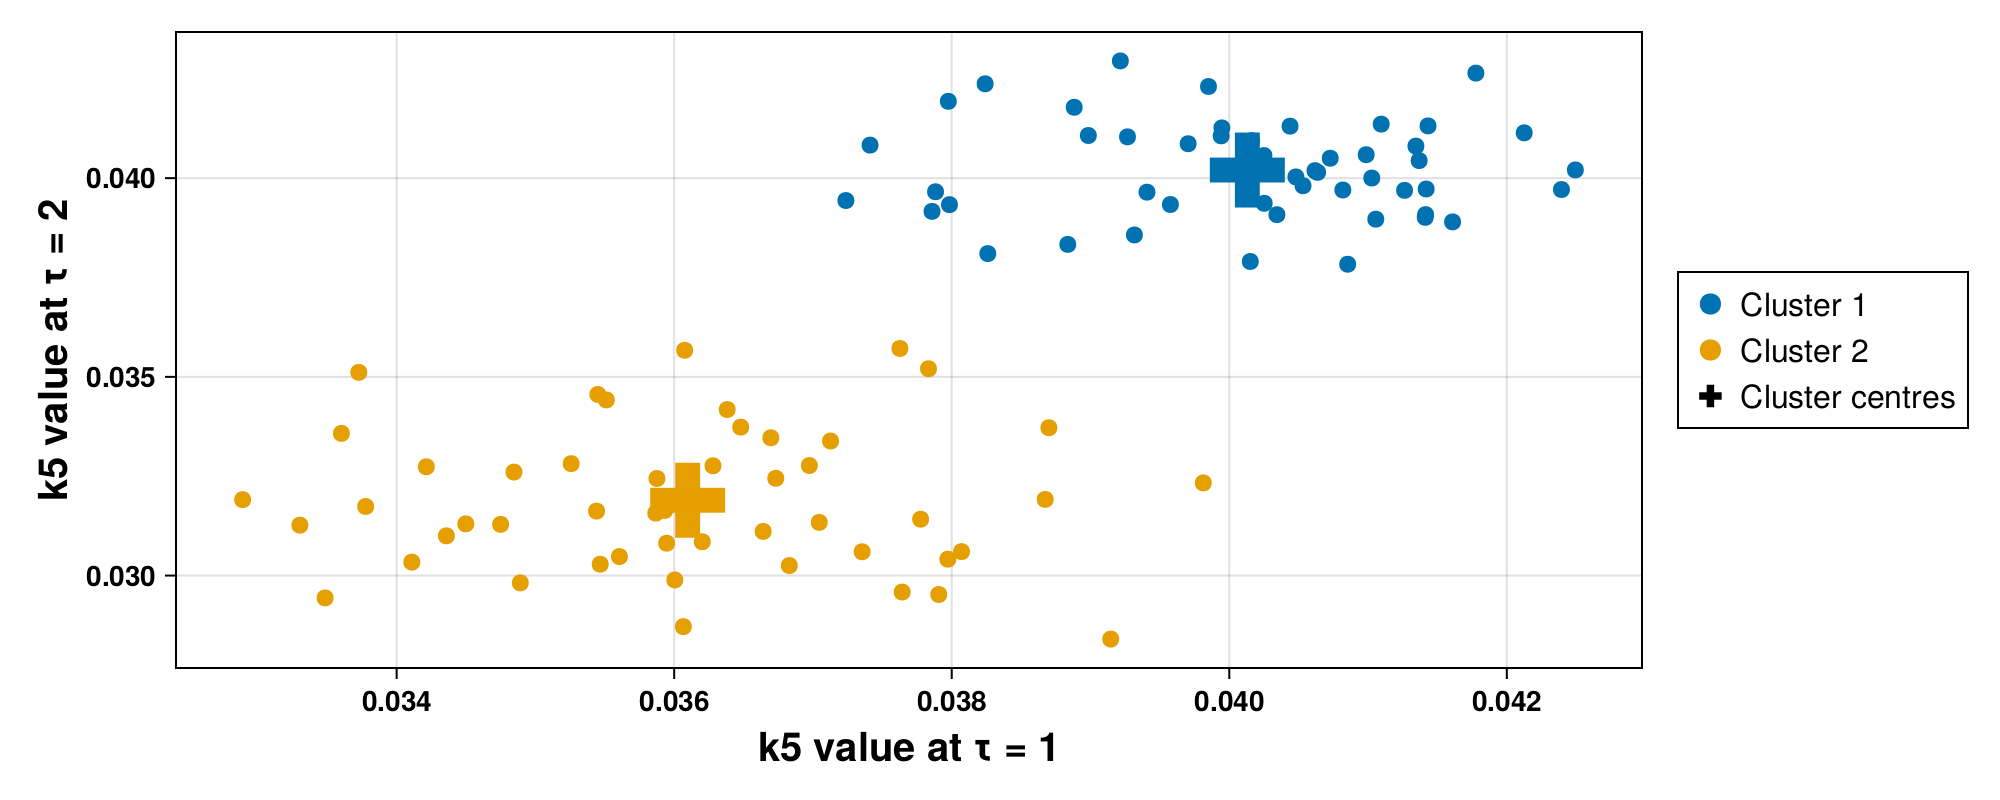

CairoMakie.Screen{IMAGE}


In [ ]:
using CairoMakie

# Extract the first two variables (rows) from centers and data
data_x = Float64.(vec(data_matrix[2, :]))  # First variable (for x-axis)
data_y = Float64.(vec(data_matrix[3, :]))  # Second variable (for y-axis)

# Cluster assignments
cluster_labels = cluster_assignments[:, 1]
cluster_centres_labels = [1,2]

# Use Makie.wong_colors() for colormap
wong_colors = Makie.wong_colors()[1:2]

# Create the figure with the specified size
fig = Figure(size = (1000, 400))  # Adjusted width to accommodate the legend

# First subplot (axis) for the scatter plot
ax = Axis(fig[1, 1], xlabel = "k5 value at τ = 1", ylabel = "k5 value at τ = 2",
          xlabelsize = 20, ylabelsize = 20, xticklabelsize = 14, yticklabelsize = 14, 
          xlabelfont = :bold, ylabelfont = :bold, xticklabelfont = :bold, yticklabelfont = :bold)

# Scatter plot of all individuals coloured by cluster assignments
scatter!(ax, data_x, data_y, color=cluster_labels, colormap=wong_colors, markersize = 14)

# Overlay cluster centers (first two variables from the centers DataFrame)
center_x = collect(centers[2, :])  # First variable of the centers
center_y = collect(centers[3, :])  # Second variable of the centers

# Ensure that the centers are treated as individual points
scatter!(ax, center_x, center_y, markersize=50, color = cluster_centres_labels, colormap=wong_colors, marker=:cross)

# Create the legend dynamically for the dots (clusters) and crosses (cluster centres)
dot_legend = [MarkerElement(color = wong_colors[i], marker = :circle, markersize = 15) for i in 1:2]
cross_legend = MarkerElement(color = :black, marker = :cross, markersize = 15)

# Combine the legend entries and labels
legend_entries = vcat(dot_legend, cross_legend)
legend_labels = vcat(["Cluster $i" for i in 1:2], ["Cluster centres"])

# Add the legend
Legend(fig[1, 2], legend_entries, legend_labels, labelsize = 16)

# Show the plot
display(fig)

# save the plot
save("./LKmeans_example_fit.png", fig)
